## In this Sample Layoff dataset which i got from Kaggle, we are going to clean the dataset and remove the unwanted data, and after going to do some visualization based on cleaned data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\DS\DataSets\layoffs.csv')

In [3]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,DealShare,Bengaluru,Retail,100.0,0.06,27-01-2023,Series E,India,390.0
1,Matrixport,Singapore,Crypto,29.0,0.10,27-01-2023,Series C,Singapore,100.0
2,SAP,Walldorf,Other,3000.0,0.03,26-01-2023,IPO,Germany,1300.0
3,Confluent,SF Bay Area,Data,221.0,0.08,26-01-2023,IPO,United States,455.0
4,Plus One Robotics,San Antonio,Other,NaN,0.10,26-01-2023,Series B,United States,43.0


In [4]:
df.shape

(2099, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2099 non-null   object 
 1   location             2099 non-null   object 
 2   industry             2098 non-null   object 
 3   total_laid_off       1445 non-null   float64
 4   percentage_laid_off  1414 non-null   float64
 5   date                 2099 non-null   object 
 6   stage                2093 non-null   object 
 7   country              2099 non-null   object 
 8   funds_raised         1931 non-null   float64
dtypes: float64(3), object(6)
memory usage: 147.7+ KB


In [6]:
df.isna().sum()

company                  0
location                 0
industry                 1
total_laid_off         654
percentage_laid_off    685
date                     0
stage                    6
country                  0
funds_raised           168
dtype: int64

### Without known the total_laid_off and percentage_laid_off, we can't use that data, so removing those Nan values

In [7]:
df.dropna(subset = ['total_laid_off','percentage_laid_off'], inplace = True)
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,DealShare,Bengaluru,Retail,100.0,0.06,27-01-2023,Series E,India,390.0
1,Matrixport,Singapore,Crypto,29.0,0.10,27-01-2023,Series C,Singapore,100.0
2,SAP,Walldorf,Other,3000.0,0.03,26-01-2023,IPO,Germany,1300.0
3,Confluent,SF Bay Area,Data,221.0,0.08,26-01-2023,IPO,United States,455.0
6,IBM,New York City,Hardware,3900.0,0.02,25-01-2023,IPO,United States,NaN
...,...,...,...,...,...,...,...,...,...
2092,Inspirato,Denver,Travel,130.0,0.22,16-03-2020,Series C,United States,79.0
2093,Help.com,Austin,Support,16.0,1.00,16-03-2020,Seed,United States,6.0
2095,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
2096,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0


In [8]:
df.isna().sum()

company                 0
location                0
industry                0
total_laid_off          0
percentage_laid_off     0
date                    0
stage                   3
country                 0
funds_raised           84
dtype: int64

#### we don't know the stage for missing values, so grouping the stage and filling the maximum values to Nan values which is in column stage, Unknown is having max values so populating Nan values as Unknown

In [9]:
df.groupby('stage').count()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,funds_raised
stage,,,,,,,,
Acquired,58,58,58,58,58,58,58,43
IPO,187,187,187,187,187,187,187,172
Private Equity,22,22,22,22,22,22,22,20
Seed,25,25,25,25,25,25,25,23
Series A,73,73,73,73,73,73,73,68
Series B,155,155,155,155,155,155,155,154
Series C,137,137,137,137,137,137,137,137
Series D,128,128,128,128,128,128,128,126
Series E,65,65,65,65,65,65,65,65


In [10]:
df.fillna({'stage' : 'Unknown'}, inplace = True)
df.isna().sum()

company                 0
location                0
industry                0
total_laid_off          0
percentage_laid_off     0
date                    0
stage                   0
country                 0
funds_raised           84
dtype: int64

#### Filling 0 for funds_raised for Nan values

In [11]:
df.fillna({'funds_raised' : 0}, inplace = True)
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

In [12]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,DealShare,Bengaluru,Retail,100.0,0.06,27-01-2023,Series E,India,390.0
1,Matrixport,Singapore,Crypto,29.0,0.10,27-01-2023,Series C,Singapore,100.0
2,SAP,Walldorf,Other,3000.0,0.03,26-01-2023,IPO,Germany,1300.0
3,Confluent,SF Bay Area,Data,221.0,0.08,26-01-2023,IPO,United States,455.0
6,IBM,New York City,Hardware,3900.0,0.02,25-01-2023,IPO,United States,0.0


#### Extracting Month and year  of laid_off

In [13]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df['year_laid_off'] = pd.to_datetime(df['date'],dayfirst = True).dt.year
df['month_laid_off'] = pd.to_datetime(df['date'],dayfirst = True).dt.month

In [14]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off
0,DealShare,Bengaluru,Retail,100.0,0.06,2023-01-27,Series E,India,390.0,2023,1
1,Matrixport,Singapore,Crypto,29.0,0.10,2023-01-27,Series C,Singapore,100.0,2023,1
2,SAP,Walldorf,Other,3000.0,0.03,2023-01-26,IPO,Germany,1300.0,2023,1
3,Confluent,SF Bay Area,Data,221.0,0.08,2023-01-26,IPO,United States,455.0,2023,1
6,IBM,New York City,Hardware,3900.0,0.02,2023-01-25,IPO,United States,0.0,2023,1


#### Finding total employee count using total_laid_off and percentage_laid_off

In [15]:
# Before count the Total Employees replacing 0 with 0.1 if any 0 present in percentage_laid_off
df['percentage_laid_off'].replace(0,0.1,inplace = True)

In [16]:
df['total_employees'] = np.where((df['total_laid_off'] * 100) > 0, round((df['total_laid_off'] * 100)/ df['percentage_laid_off']), 0)
df['total_employees']  = df['total_employees'].astype(int)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees
0,DealShare,Bengaluru,Retail,100.0,0.06,2023-01-27,Series E,India,390.0,2023,1,166667
1,Matrixport,Singapore,Crypto,29.0,0.10,2023-01-27,Series C,Singapore,100.0,2023,1,29000
2,SAP,Walldorf,Other,3000.0,0.03,2023-01-26,IPO,Germany,1300.0,2023,1,10000000
3,Confluent,SF Bay Area,Data,221.0,0.08,2023-01-26,IPO,United States,455.0,2023,1,276250
6,IBM,New York City,Hardware,3900.0,0.02,2023-01-25,IPO,United States,0.0,2023,1,19500000


In [17]:
df.loc[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees
1240,Cazoo,London,Transportation,750.0,0.15,2022-06-07,IPO,United Kingdom,2000.0,2022,6,500000


In [18]:
df.drop(index = 1240, inplace = True)
df.loc[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees


#### Now dataset is cleaned and ready for plotting it
## plotting

In [19]:
country_wise_layoff = df.groupby('country').sum('total_laid_off')
country_wise_layoff.head()

,total_laid_off,percentage_laid_off,funds_raised,year_laid_off,month_laid_off,total_employees
country,,,,,,
Argentina,283.0,0.91,572.0,8088,37,320761
Australia,1119.0,5.88,2717.0,32348,123,377945
Austria,270.0,0.27,546.0,2022,6,100000
Brazil,7733.0,9.77,8460.7,97028,286,6144305
Bulgaria,120.0,0.10,0.0,2020,6,120000


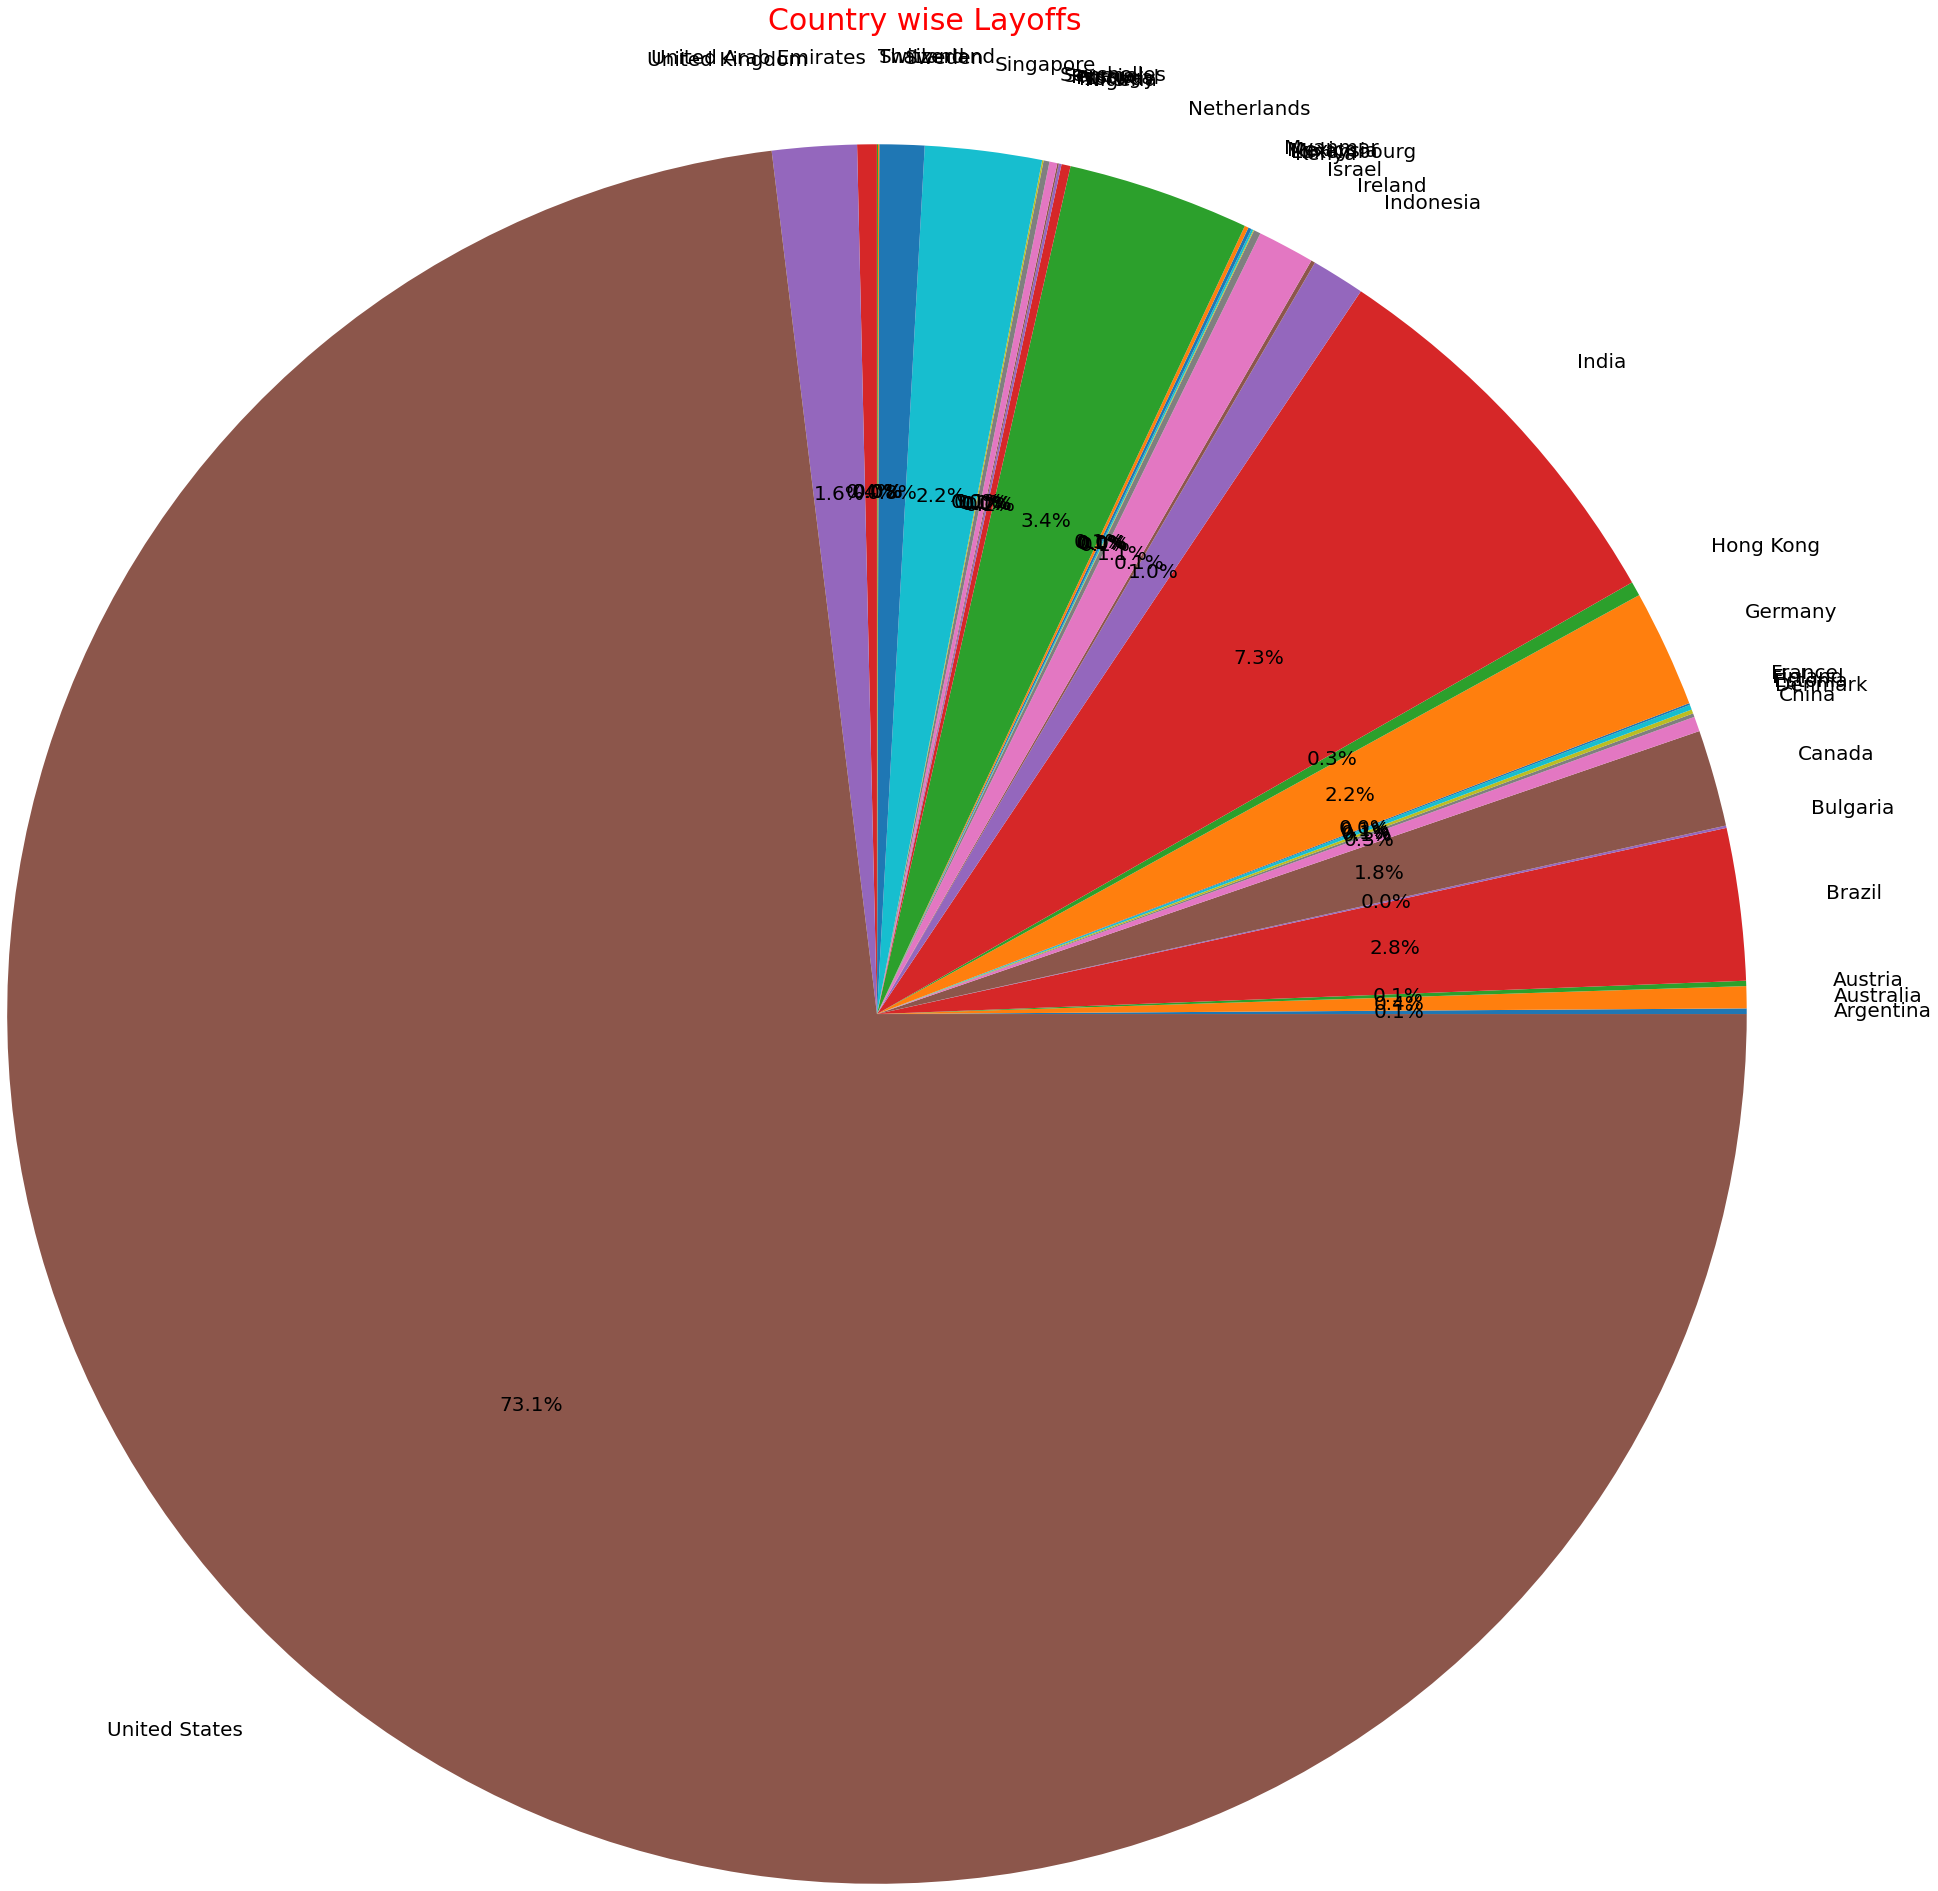

In [20]:
plt.pie(country_wise_layoff['total_laid_off'],labels = country_wise_layoff.index,autopct = '%1.1f%%', radius = 10,textprops={'fontsize': 20})
plt.title('Country wise Layoffs',loc = 'left', y = 5,fontsize = 30,color = 'r')
plt.show()

In [21]:
stage_wise_layoff = df.groupby('stage').sum('total_laid_off')
stage_wise_layoff.head()

,total_laid_off,percentage_laid_off,funds_raised,year_laid_off,month_laid_off,total_employees
stage,,,,,,
Acquired,15204.0,18.6140,10784.6000,117232,391,9089074
IPO,151382.0,28.1485,516657.1000,376064,1157,257351034
Private Equity,6386.0,2.9500,22288.0000,44468,167,7700265
Seed,1284.0,14.7000,112.4755,50525,144,273495
Series A,3816.0,24.2900,2858.1000,147556,457,1414276


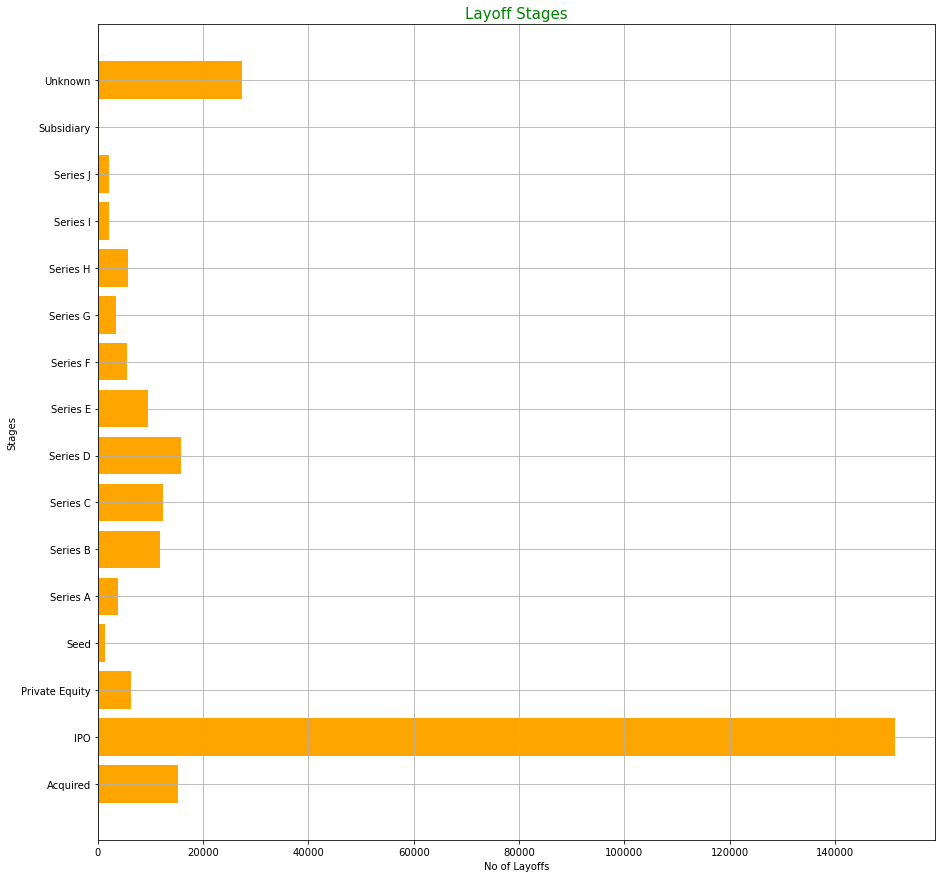

In [22]:
plt.figure(figsize=(15,15))
plt.barh(stage_wise_layoff.index,stage_wise_layoff['total_laid_off'],color = 'orange')
plt.title('Layoff Stages', color = 'g',fontsize = 15)
plt.xlabel('No of Layoffs')
plt.ylabel('Stages')
plt.grid()
plt.show()

In [23]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees
0,DealShare,Bengaluru,Retail,100.0,0.06,2023-01-27,Series E,India,390.0,2023,1,166667
1,Matrixport,Singapore,Crypto,29.0,0.10,2023-01-27,Series C,Singapore,100.0,2023,1,29000
2,SAP,Walldorf,Other,3000.0,0.03,2023-01-26,IPO,Germany,1300.0,2023,1,10000000
3,Confluent,SF Bay Area,Data,221.0,0.08,2023-01-26,IPO,United States,455.0,2023,1,276250
6,IBM,New York City,Hardware,3900.0,0.02,2023-01-25,IPO,United States,0.0,2023,1,19500000


In [24]:
# Company which is No 1 in Laid off
df.groupby('company')['total_laid_off'].sum().idxmax()

'Amazon'

In [25]:
# Company which is Laid off very less people
df.groupby('company')['total_laid_off'].sum().idxmin()

'Branch'

In [26]:
df1 = df.loc[(df['company'] == 'Amazon') | (df['company'] == 'Branch')]
df2 = df1.groupby('company').sum('total_laid_off')
df2.head()

,total_laid_off,percentage_laid_off,funds_raised,year_laid_off,month_laid_off,total_employees
company,,,,,,
Amazon,18000.0,0.05,216.0,4045,12,73333333
Branch,3.0,0.27,2.0,2020,6,1111


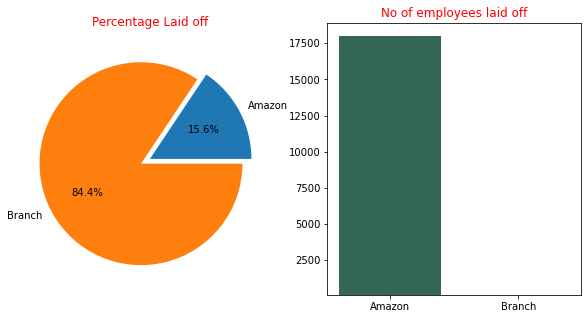

In [27]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(10,5))

ax.pie(df2['percentage_laid_off'],labels = df2.index,autopct = '%1.1f%%',explode = [0,0.1])
ax.set_title('Percentage Laid off',color = 'r')

ax1.bar(df2.index,height = df2['total_laid_off'], color = '#336655')
ax1.set_ylim(100)
ax1.set_title('No of employees laid off',color = 'r')

plt.show()

In [28]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees
0,DealShare,Bengaluru,Retail,100.0,0.06,2023-01-27,Series E,India,390.0,2023,1,166667
1,Matrixport,Singapore,Crypto,29.0,0.10,2023-01-27,Series C,Singapore,100.0,2023,1,29000
2,SAP,Walldorf,Other,3000.0,0.03,2023-01-26,IPO,Germany,1300.0,2023,1,10000000
3,Confluent,SF Bay Area,Data,221.0,0.08,2023-01-26,IPO,United States,455.0,2023,1,276250
6,IBM,New York City,Hardware,3900.0,0.02,2023-01-25,IPO,United States,0.0,2023,1,19500000


In [29]:
industry_wise_layoff = df.groupby('industry').sum('total_laid_off')
industry_wise_layoff.head()

,total_laid_off,percentage_laid_off,funds_raised,year_laid_off,month_laid_off,total_employees
industry,,,,,,
Aerospace,591.0,2.10,3101.0,6062,16,79059
Construction,3703.0,2.64,5149.0,18189,63,1965925
Consumer,37211.0,13.04,60905.5,101067,301,34955565
Crypto,9783.0,11.10,10758.0,97061,331,4708609
Data,2969.0,7.89,10104.4,68726,182,3399609


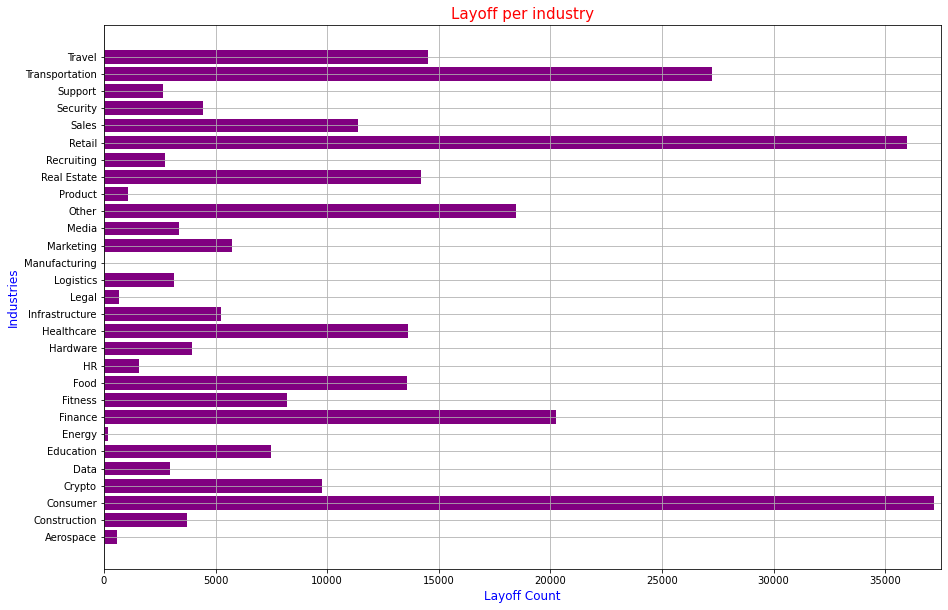

In [30]:
plt.figure(figsize=(15,10))
plt.barh(industry_wise_layoff.index,industry_wise_layoff['total_laid_off'],color = 'purple')
plt.title('Layoff per industry',fontsize = 15, color = 'r')
plt.xlabel('Layoff Count',fontsize = 12, color = 'b')
plt.ylabel('Industries',fontsize = 12, color = 'b')
plt.xlim(0,37500)
plt.grid()
plt.show()

In [31]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year_laid_off,month_laid_off,total_employees
0,DealShare,Bengaluru,Retail,100.0,0.06,2023-01-27,Series E,India,390.0,2023,1,166667
1,Matrixport,Singapore,Crypto,29.0,0.10,2023-01-27,Series C,Singapore,100.0,2023,1,29000
2,SAP,Walldorf,Other,3000.0,0.03,2023-01-26,IPO,Germany,1300.0,2023,1,10000000
3,Confluent,SF Bay Area,Data,221.0,0.08,2023-01-26,IPO,United States,455.0,2023,1,276250
6,IBM,New York City,Hardware,3900.0,0.02,2023-01-25,IPO,United States,0.0,2023,1,19500000


In [32]:
year_wise_layoff = df.groupby('year_laid_off').sum('total_laid_off')
year_wise_layoff.head()

,total_laid_off,percentage_laid_off,funds_raised,month_laid_off,total_employees
year_laid_off,,,,,
2020,70621.0,99.0325,228311.1555,1648,44664225
2021,6503.0,6.9800,5685.7000,72,2741253
2022,134238.0,126.2750,545380.0000,4978,155958787
2023,62554.0,17.0700,48520.0000,100,136167081


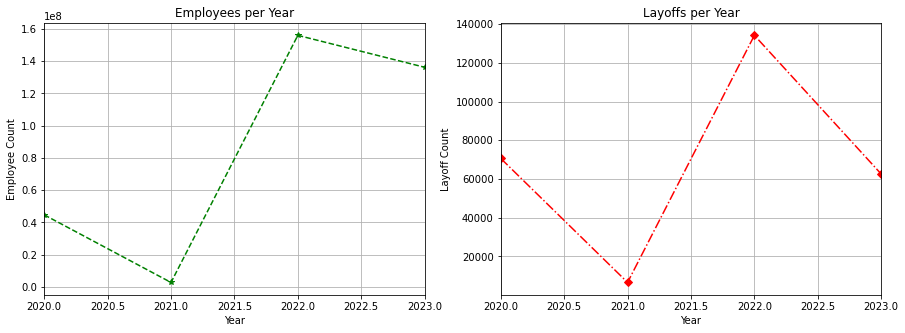

In [33]:
fig , (ax,ax1) = plt.subplots(1,2,figsize=(15,5))

ax.plot(year_wise_layoff.index,year_wise_layoff['total_employees'],'g*--')
ax.set_title('Employees per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Employee Count')
ax.set_xlim(2020,2023)
ax.grid()

ax1.plot(year_wise_layoff.index,year_wise_layoff['total_laid_off'],'rD-.')
ax1.set_title('Layoffs per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Layoff Count')
ax1.set_xlim(2020,2023)
ax1.grid()

plt.show()

### From the above Analysis,
    1. Amazon is the highest laid off company and Branch is lowest layoff company
    2. USA has highest layoff percentage and India is Second one
    3. When the company going for IPO, layofff happening so much compared to other stages
    4. Consumer, Retail and Transporatation is the top 3 industries where layoff happened
    5. In Year 2022 has so much employee count and layoff count